# Titanic Dataset Exploratory Data Analysis

## Project Description
The goal of this project is to perform an Exploratory Data Analysis (EDA) on the famous Titanic dataset. We aim to identify patterns and trends that indicate which groups of passengers were more likely to survive the disaster.

We will analyze:
1. Data cleaning and handling missing values.
2. Survival rates based on gender and ticket class.
3. Age distribution of survivors vs. non-survivors.
4. Correlations between different variables.

This project uses Python libraries: Pandas for data manipulation, and Matplotlib/Seaborn for visualization.

In [1]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install  seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Dataset loaded successfully from local file!
Shape of dataset: (891, 15)

Missing values before cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


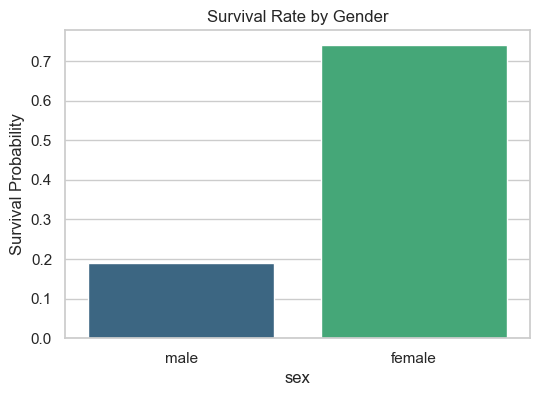

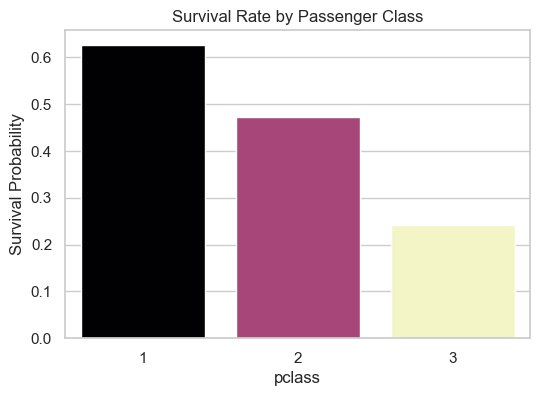

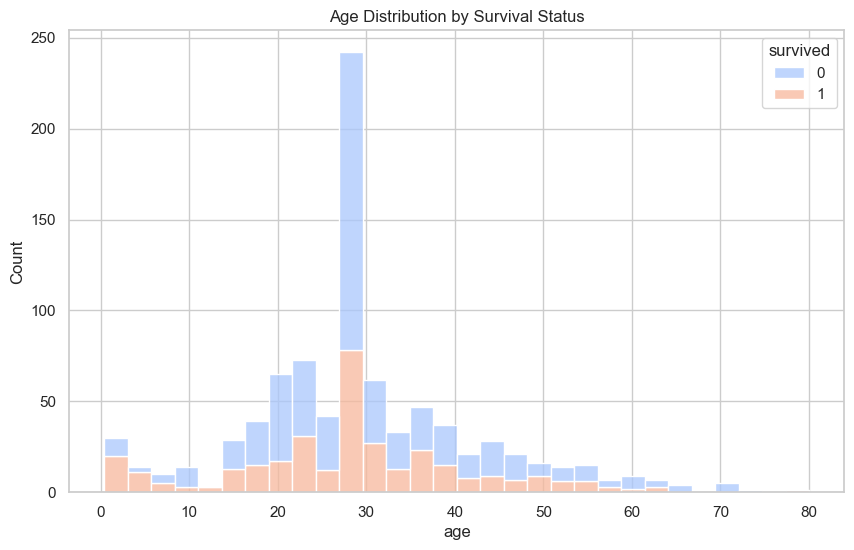

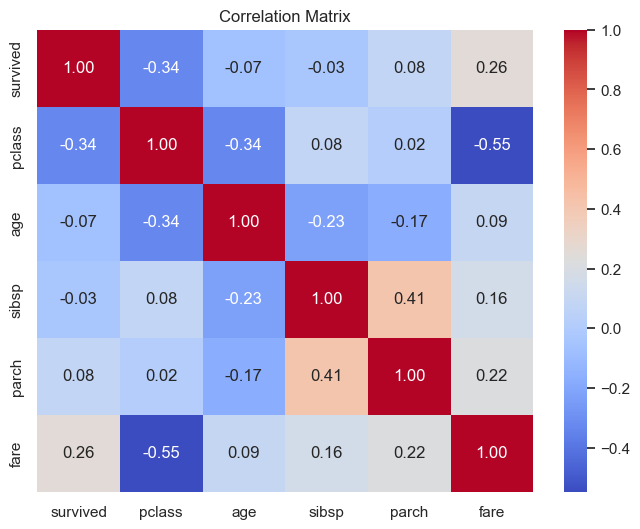

In [ ]:
# --- 1. Data Collection ---
# Ми намагаємось завантажити файл локально, щоб не залежати від інтернету.
# Якщо файлу немає, скрипт спробує завантажити його з бібліотеки seaborn.
try:
    df = pd.read_csv('titanic.csv')
    print("Dataset loaded successfully from local file!")
except FileNotFoundError:
    print("ERROR: File 'titanic.csv' not found. Please download it and place it in the project folder.")
    # Fallback (на випадок, якщо файлу немає, щоб код не впав)
    print("Attempting to load from internet as backup...")
    df = sns.load_dataset('titanic')

# --- 2. Data Inspection & Cleaning ---
print("Shape of dataset:", df.shape)
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Заповнюємо пропуски у віці медіанним значенням
# Колонка 'age' (Вік):
# Ми заповнюємо пропуски МЕДІАНОЮ, а не середнім значенням.
# Чому? Медіана менш чутлива до "викидів" (дуже старих або дуже молодих людей),
# тому вона дає більш реалістичний середній вік пасажира.
df['age'] = df['age'].fillna(df['age'].median())

# Колонка 'deck' має забагато пропусків, видаляємо її
df.drop('deck', axis=1, inplace=True)

# Колонка 'embarked' (Порт посадки):
# Тут пропущено лише 2 значення. Це менше 1% даних.
# Ми можемо безпечно видалити ці два рядки без втрати якості аналізу.
df.dropna(subset=['embarked'], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# --- 3. Visualization ---
sns.set_theme(style="whitegrid")

# Графік 1: Виживання за статтю
plt.figure(figsize=(6, 4))
# hue='sex': розфарбовує стовпчики в різні кольори залежно від статі
# errorbar=None: щоб графік був чистішим
sns.barplot(data=df, x='sex', y='survived', hue='sex', legend=False, errorbar=None, palette='viridis')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Probability')
plt.show()

# Графік 2: Виживання за класом каюти
plt.figure(figsize=(6, 4))
# Ми бачимо, як багатство (клас квитка) впливало на шанс порятунку
sns.barplot(data=df, x='pclass', y='survived', hue='pclass', legend=False, errorbar=None, palette='magma')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

# Графік 3: Розподіл віку
plt.figure(figsize=(10, 6))
# multiple="stack": накладає виживших і загиблих один на одного,
# щоб ми бачили загальну кількість людей різного віку
sns.histplot(data=df, x='age', hue='survived', multiple="stack", palette='coolwarm')
plt.title('Age Distribution by Survival Status')
plt.show()

# Графік 4: Теплова карта кореляції
plt.figure(figsize=(8, 6))
# Вибираємо тільки числа, бо кореляцію не можна порахувати для тексту
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# cmap='coolwarm': червоний = позитивна кореляція, синій = негативна
# annot=True: пише цифри всередині квадратів
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 4. Results & Analysis

### Data Cleaning Process
The initial dataset contained **891 records** and **15 columns**. Upon inspection, we identified missing values in:
* `deck`: 688 missing values (too many to fill, so the column was dropped).
* `age`: 177 missing values (filled with the median age to preserve data distribution).
* `embarked`: 2 missing values (rows were dropped as insignificant loss).

After cleaning, we proceeded with a complete dataset of **889 rows**.

### Key Findings
1.  **Gender Disparity:**
    * The visualization clearly indicates that **females** had a much higher survival probability (~74%) compared to **males** (~19%). This confirms the historical "women and children first" policy.

2.  **Class Hierarchy:**
    * **First-class** passengers had the highest survival rate (>60%).
    * **Third-class** passengers had the lowest survival rate (<25%).
    * This suggests a strong correlation between socio-economic status and survival chances.

3.  **Age Distribution:**
    * The histogram shows that children (ages 0-10) had a higher survival rate relative to their population size compared to adults aged 20-30, who made up the bulk of casualties.

4.  **Correlations:**
    * We observed a negative correlation between `pclass` and `fare` (expected, as better classes cost more).
    * There is a significant negative correlation between `pclass` and `survived` (lower class number 1 = higher survival), reinforcing the findings from the bar charts.

### Conclusion
The analysis successfully identifies the key factors for survival on the Titanic: being female, being a child, or having a first-class ticket significantly increased the odds of survival.